In [1]:
#importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
train_dir=r'../input/leaf-disease-detection-dataset/dataset/train'
test_dir=r'../input/leaf-disease-detection-dataset/dataset/test'

In [3]:
for d in [train_dir, test_dir]:
    filepaths = []
    labels=[] 
    classlist=sorted(os.listdir(d))
    for klass in classlist:
        label=klass.split('__')[1]
        classpath=os.path.join(d, klass)
        flist=sorted(os.listdir(classpath))
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)            
            labels.append(label)
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')        
    if d == train_dir:
        df=pd.concat([Fseries, Lseries], axis=1)
    else:
        test_df=pd.concat([Fseries, Lseries], axis=1)

In [4]:
print(df)

                                               filepaths       labels
0      ../input/leaf-disease-detection-dataset/datase...  _Apple_scab
1      ../input/leaf-disease-detection-dataset/datase...  _Apple_scab
2      ../input/leaf-disease-detection-dataset/datase...  _Apple_scab
3      ../input/leaf-disease-detection-dataset/datase...  _Apple_scab
4      ../input/leaf-disease-detection-dataset/datase...  _Apple_scab
...                                                  ...          ...
70290  ../input/leaf-disease-detection-dataset/datase...     _healthy
70291  ../input/leaf-disease-detection-dataset/datase...     _healthy
70292  ../input/leaf-disease-detection-dataset/datase...     _healthy
70293  ../input/leaf-disease-detection-dataset/datase...     _healthy
70294  ../input/leaf-disease-detection-dataset/datase...     _healthy

[70295 rows x 2 columns]


In [5]:
train_df, test_df = train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=df['labels'])   
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  test_df length: ', len(test_df))

train_df lenght:  63265   test_df length:  7030   test_df length:  7030


In [6]:
train_df

filepaths  \
61159  ../input/leaf-disease-detection-dataset/datase...   
43724  ../input/leaf-disease-detection-dataset/datase...   
17835  ../input/leaf-disease-detection-dataset/datase...   
20895  ../input/leaf-disease-detection-dataset/datase...   
66965  ../input/leaf-disease-detection-dataset/datase...   
...                                                  ...   
41505  ../input/leaf-disease-detection-dataset/datase...   
25229  ../input/leaf-disease-detection-dataset/datase...   
28398  ../input/leaf-disease-detection-dataset/datase...   
13628  ../input/leaf-disease-detection-dataset/datase...   
31630  ../input/leaf-disease-detection-dataset/datase...   

                                      labels  
61159  _Spider_mites Two-spotted_spider_mite  
43724                               _healthy  
17835                  _Northern_Leaf_Blight  
20895                             _Black_rot  
66965                   _Tomato_mosaic_virus  
...                                      ...  
41505                               _healthy  
25229    _Leaf_blight_(Isariopsis_Leaf_Spot)  
28398       _Haunglongbing_(Citrus_greening)  
13628   _Cercospora_leaf_spot Gray_leaf_spot  
31630                               _healthy  

[63265 rows x 2 columns]

In [7]:
test_df

filepaths  \
59806  ../input/leaf-disease-detection-dataset/datase...   
22686  ../input/leaf-disease-detection-dataset/datase...   
38535  ../input/leaf-disease-detection-dataset/datase...   
33639  ../input/leaf-disease-detection-dataset/datase...   
25914  ../input/leaf-disease-detection-dataset/datase...   
...                                                  ...   
13147  ../input/leaf-disease-detection-dataset/datase...   
31310  ../input/leaf-disease-detection-dataset/datase...   
321    ../input/leaf-disease-detection-dataset/datase...   
57050  ../input/leaf-disease-detection-dataset/datase...   
50899  ../input/leaf-disease-detection-dataset/datase...   

                                     labels  
59806                   _Septoria_leaf_spot  
22686                 _Esca_(Black_Measles)  
38535                         _Early_blight  
33639                       _Bacterial_spot  
25914   _Leaf_blight_(Isariopsis_Leaf_Spot)  
...                                     ...  
13147  _Cercospora_leaf_spot Gray_leaf_spot  
31310                       _Bacterial_spot  
321                             _Apple_scab  
57050                          _Late_blight  
50899                              _healthy  

[7030 rows x 2 columns]

In [8]:
# get the number of classes and the images count for each class in train_df
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

The number of classes in the dataset is:  21
            CLASS               IMAGE COUNT 
         _Apple_scab               1814     
       _Bacterial_spot             4908     
          _Black_rot               3487     
      _Cedar_apple_rust            1584     
_Cercospora_leaf_spot Gray_leaf_spot     1478     
        _Common_rust_              1716     
        _Early_blight              3473     
    _Esca_(Black_Measles)          1728     
_Haunglongbing_(Citrus_greening)     1809     
         _Late_blight              3411     
          _Leaf_Mold               1694     
_Leaf_blight_(Isariopsis_Leaf_Spot)     1550     
         _Leaf_scorch              1597     
    _Northern_Leaf_Blight          1717     
       _Powdery_mildew             3077     
     _Septoria_leaf_spot           1571     
_Spider_mites Two-spotted_spider_mite     1567     
         _Target_Spot              1644     
_Tomato_Yellow_Leaf_Curl_Virus     1765     
     _Tomato_mosaic_virus          

In [9]:
# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)

_healthy  has the most images=  20064   _Cercospora_leaf_spot Gray_leaf_spot  has the least images=  1478


In [10]:
# lets get the average height and width of a sample of the train images
ht=0
wt=0

# select 1000 random samples of train_df
train_df_sample=train_df.sample(n=1000, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
    
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

average height=  2560  average width=  2560 aspect ratio=  1.0


In [11]:
train_gen = ImageDataGenerator(rescale=None,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=None,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set=train_gen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode='categorical')

test_set=test_gen.flow_from_directory(test_dir,
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


**Create a function to show example training images**

Images for Training......................


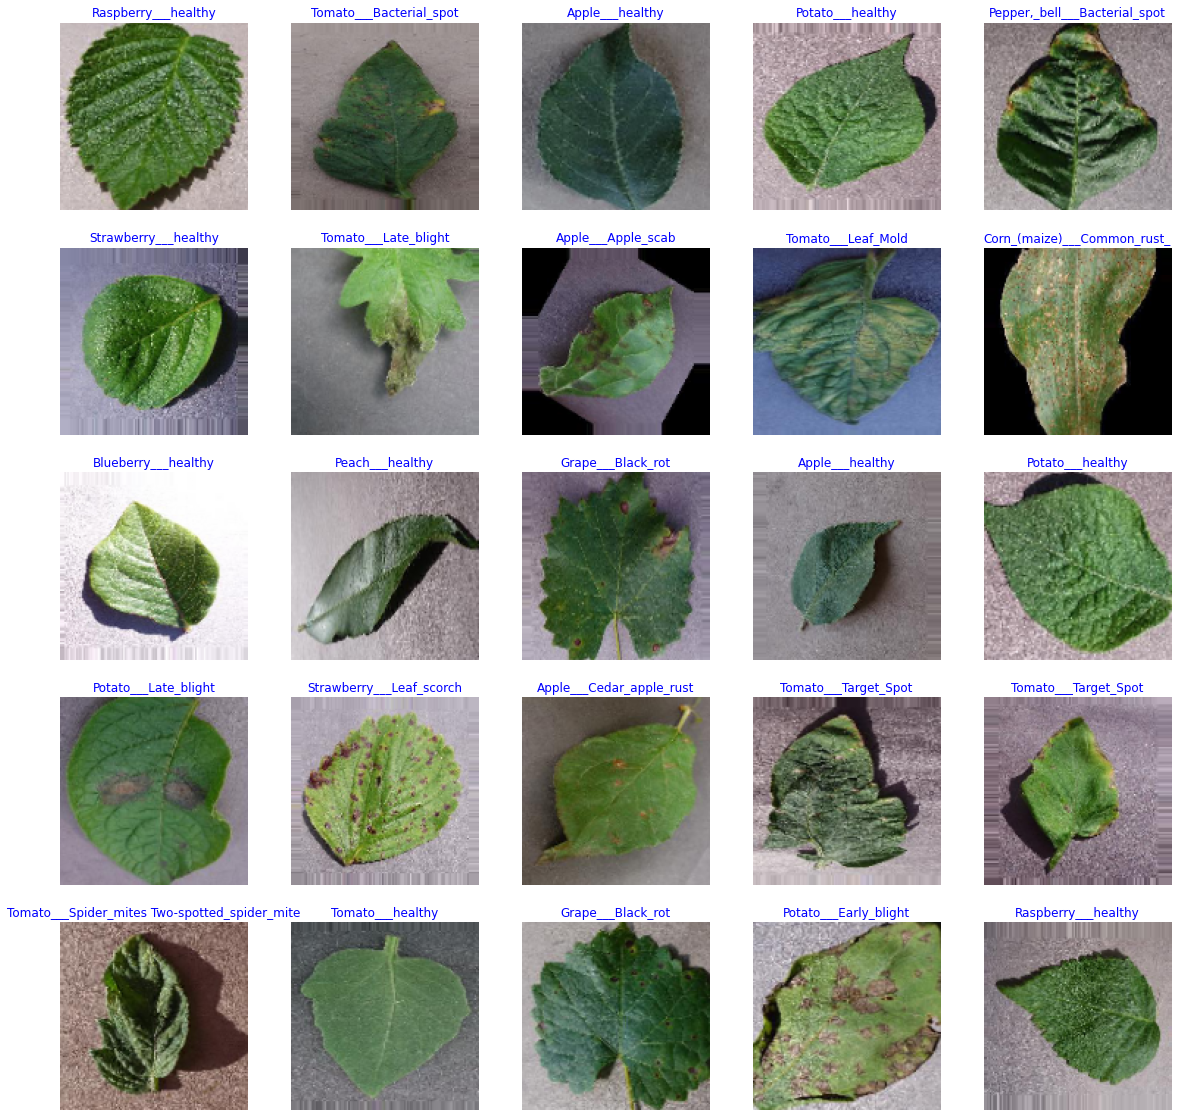

Images for Testing.......................


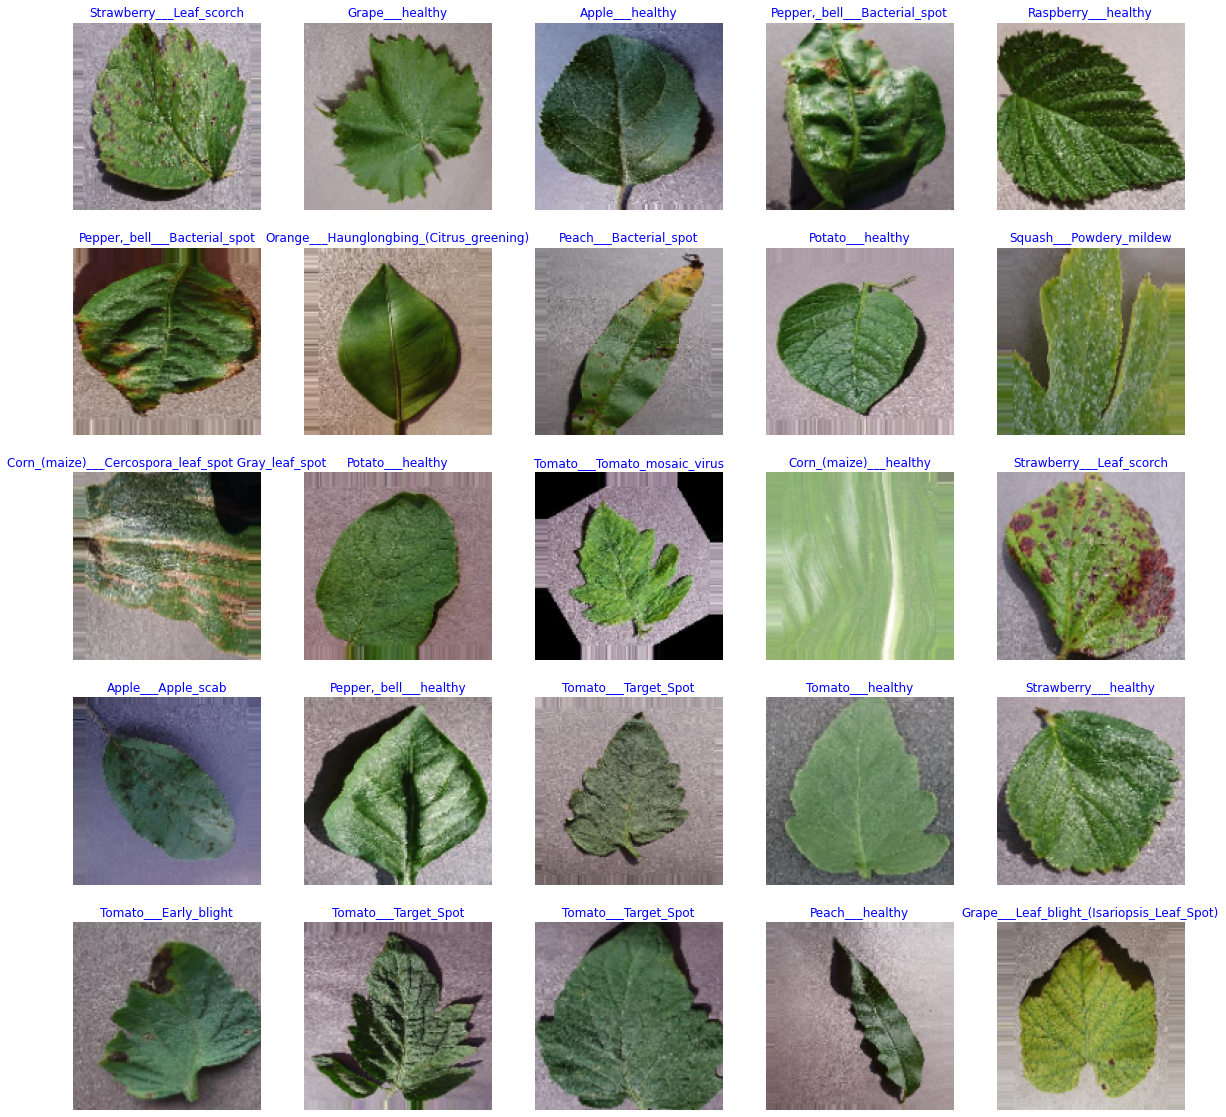

In [12]:
def show_image_samples(gen):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()
    
print("Images for Training......................")
show_image_samples(training_set )
print("Images for Testing.......................")
show_image_samples(test_set )

# Convolutional Neural Network

In [13]:
#basic cnn layers
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation = 'relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size =(2,2,)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2,)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2,)))
model.add(BatchNormalization())
model.add(Conv2D(96,kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2,)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2,)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(38, activation = 'softmax'))
#compiling our model 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [15]:
import tensorflow as tf

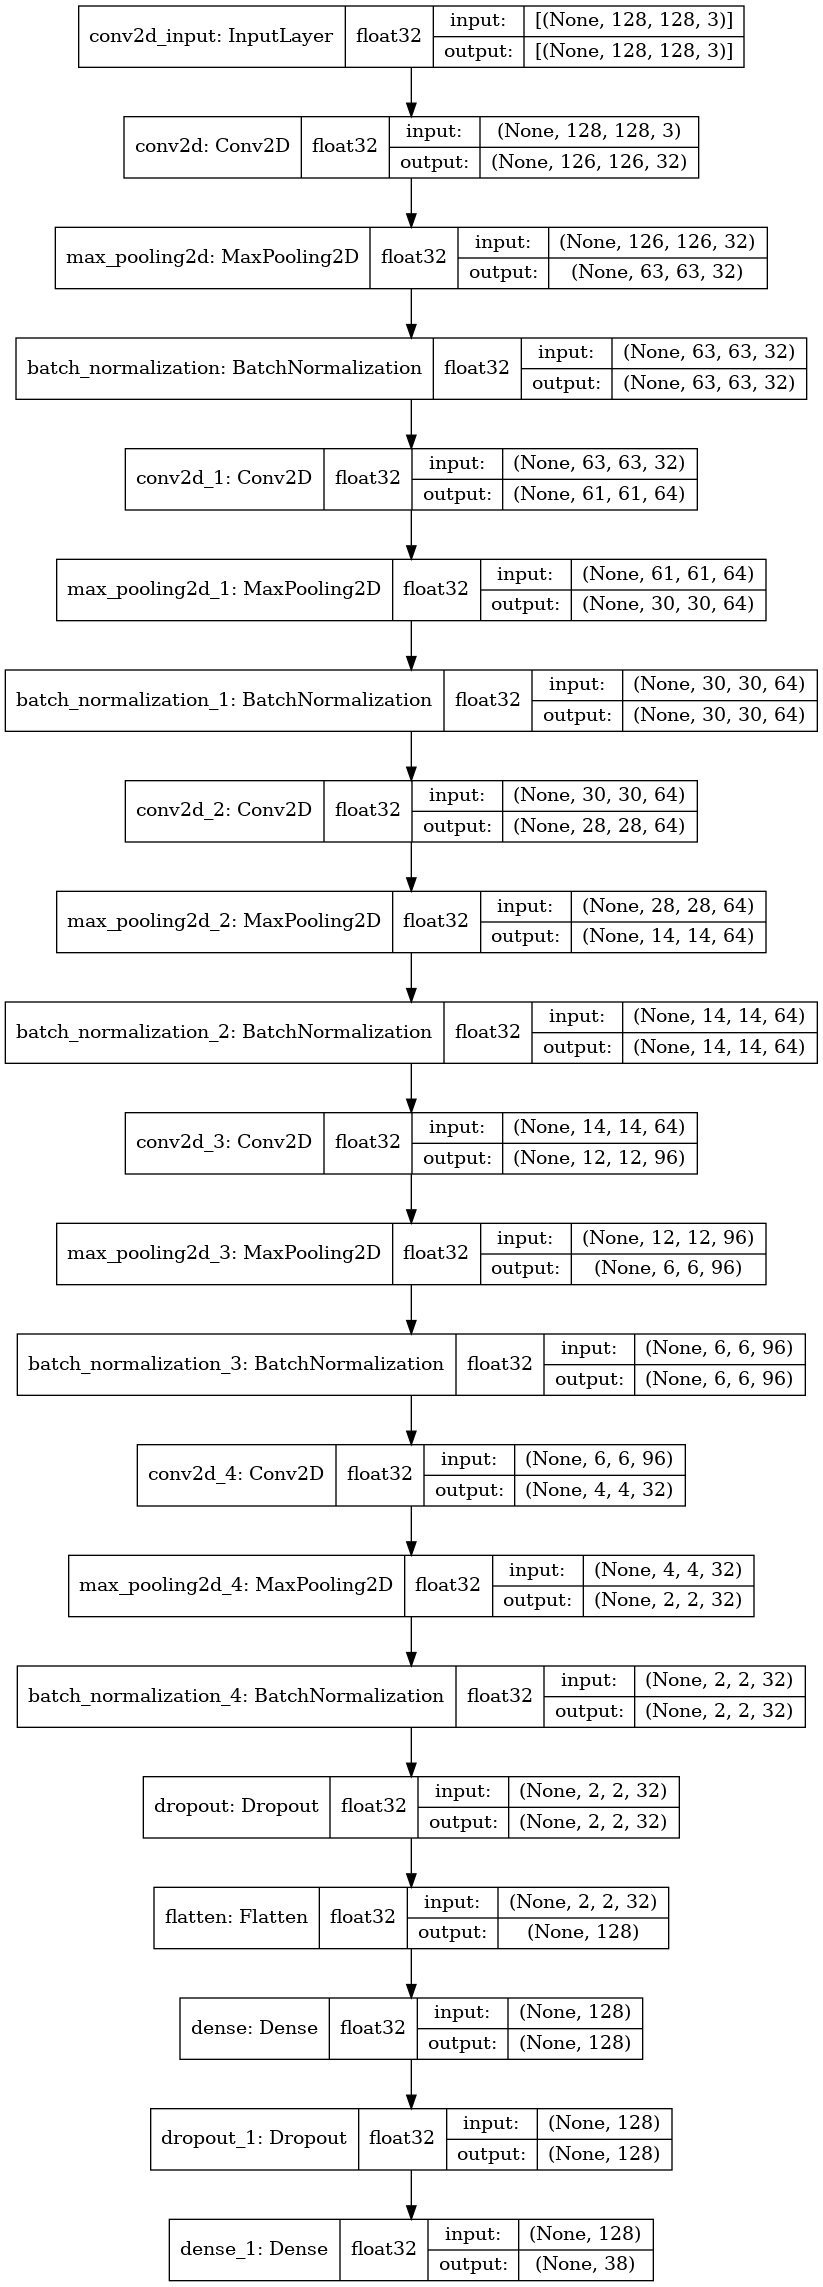

In [16]:
tf.keras.utils.plot_model(model=model,
           to_file='Inception.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True)

In [17]:
labels=(training_set.class_indices)
labels2=(test_set.class_indices)
#fitting data into our model
# fitted_model_10 = model.fit(training_set,
#                     steps_per_epoch=1,
#                     epochs=10,
#                     validation_data = test_set,
#                     validation_steps = 125)

fitted_model_10 = model.fit(training_set,
                    steps_per_epoch=375,
                    epochs=10,
                    validation_data = test_set,
                    validation_steps = 125)

Epoch 1/10
375/375 [==============================] - 284s 752ms/step - loss: 2.5542 - accuracy: 0.2924 - val_loss: 3.1846 - val_accuracy: 0.2175
Epoch 2/10
375/375 [==============================] - 268s 713ms/step - loss: 1.6122 - accuracy: 0.5135 - val_loss: 1.2426 - val_accuracy: 0.6267
Epoch 3/10
375/375 [==============================] - 252s 672ms/step - loss: 1.2571 - accuracy: 0.6072 - val_loss: 1.3655 - val_accuracy: 0.5785
Epoch 4/10
375/375 [==============================] - 241s 643ms/step - loss: 1.0149 - accuracy: 0.6812 - val_loss: 1.0365 - val_accuracy: 0.6773
Epoch 5/10
375/375 [==============================] - 234s 625ms/step - loss: 0.8905 - accuracy: 0.7172 - val_loss: 0.8580 - val_accuracy: 0.7150
Epoch 6/10
375/375 [==============================] - 228s 607ms/step - loss: 0.7800 - accuracy: 0.7538 - val_loss: 0.7562 - val_accuracy: 0.7520
Epoch 7/10
375/375 [==============================] - 223s 594ms/step - loss: 0.6914 - accuracy: 0.7780 - val_loss: 0.4599 -

In [18]:
# extract features from trained CNN model
cnn_features_train = model.predict(training_set)
cnn_features_test = model.predict(test_set)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# build RF model
rf_model = RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16)
rf_model.fit(cnn_features_train, training_set.classes)

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)

In [21]:
# make predictions on test set
rf_preds = rf_model.predict(cnn_features_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
# evaluate model performance
accuracy = accuracy_score(test_set.classes, rf_preds)
# precision = precision_score(test_set.classes, rf_preds)
# recall = recall_score(test_set.classes, rf_preds)
# f1 = f1_score(test_set.classes, rf_preds)
print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 score: {f1}")

Accuracy: 0.027088549965854768


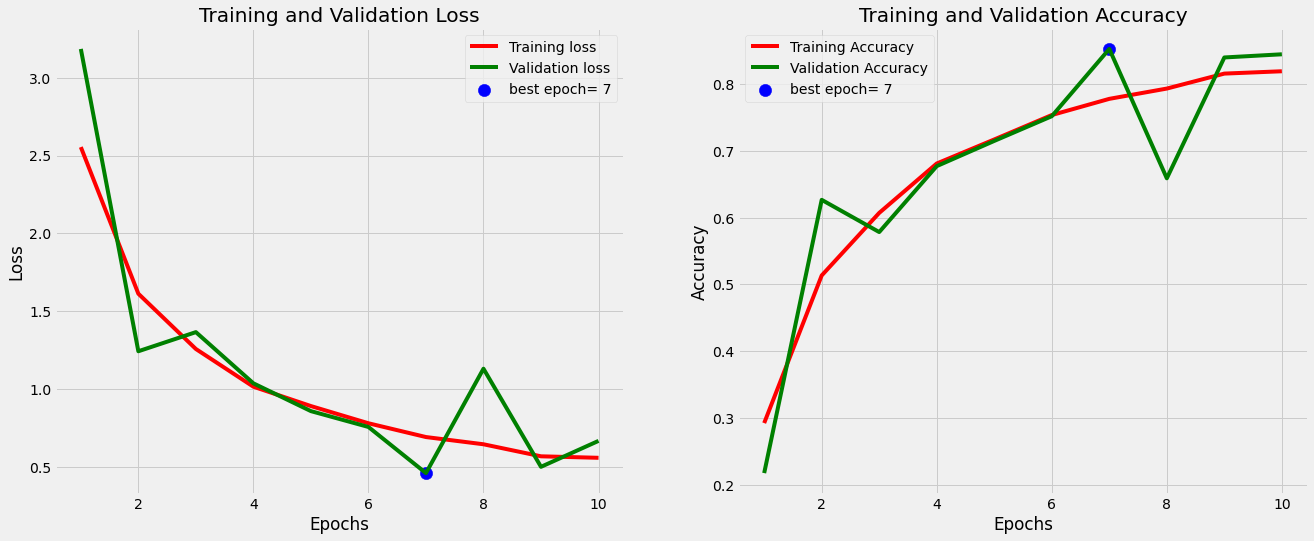

In [24]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(fitted_model_10,0)